In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#VALAJOUT LOADING
VALAJOUT = pd.read_csv(f'../Y3 - Sample data/Z4 - VALAJOUT-predictions.csv', index_col=0)
VALAJOUT = VALAJOUT.rename(columns={'pred_lgbm_BOXCOX':'pred_VALAJOUT', 'target':'VALAJOUT'})
VALAJOUT = VALAJOUT.drop(['thickness', 'bend_group'], axis=1)
VALAJOUT.head()

,COART,pred_VALAJOUT,VALAJOUT
0,L3104170,2.584162,3.72
1,L8826140,1.874523,1.98
2,L1615860,0.601494,0.80
3,L8055440,2.309718,2.55
4,L8042170,1.840552,1.68


In [3]:
#VAMAT LOADING
VAMAT = pd.read_csv(f'../Y3 - Sample data/Z4 - VAMAT-predictions.csv', index_col=0)
VAMAT = VAMAT.rename(columns={'pred_lgbm_BOXCOX':'pred_VAMAT', 'target':'VAMAT'})
VAMAT.head()

,COART,pred_VAMAT,VAMAT,thickness,bend_group
0,L3104170,4.506715,4.41,5.0,0
1,L8826140,0.519846,0.44,6.0,1-2
2,L1615860,0.236173,0.24,5.0,0
3,L8055440,2.039501,2.00,10.0,1-2
4,L8042170,1.588142,2.06,6.0,1-2


In [4]:
#Data assembly
dataset = pd.merge(VAMAT, VALAJOUT, on='COART', how='inner')
dataset.shape

(1295, 7)

In [5]:
dataset.head()

,COART,pred_VAMAT,VAMAT,thickness,bend_group,pred_VALAJOUT,VALAJOUT
0,L3104170,4.506715,4.41,5.0,0,2.584162,3.72
1,L8826140,0.519846,0.44,6.0,1-2,1.874523,1.98
2,L1615860,0.236173,0.24,5.0,0,0.601494,0.80
3,L8055440,2.039501,2.00,10.0,1-2,2.309718,2.55
4,L8042170,1.588142,2.06,6.0,1-2,1.840552,1.68


In [6]:
dataset['VALTOT'] = dataset['VALAJOUT'] + dataset['VAMAT']
dataset['pred_VALTOT'] = dataset['pred_VALAJOUT'] + dataset['pred_VAMAT']
dataset['delta_VALTOT'] = dataset['VALTOT'] - dataset['pred_VALTOT']
dataset.head()

,COART,pred_VAMAT,VAMAT,thickness,bend_group,pred_VALAJOUT,VALAJOUT,VALTOT,pred_VALTOT,delta_VALTOT
0,L3104170,4.506715,4.41,5.0,0,2.584162,3.72,8.13,7.090877,1.039123
1,L8826140,0.519846,0.44,6.0,1-2,1.874523,1.98,2.42,2.394369,0.025631
2,L1615860,0.236173,0.24,5.0,0,0.601494,0.80,1.04,0.837667,0.202333
3,L8055440,2.039501,2.00,10.0,1-2,2.309718,2.55,4.55,4.349220,0.200780
4,L8042170,1.588142,2.06,6.0,1-2,1.840552,1.68,3.74,3.428694,0.311306


# Metrics

In [7]:
# Metric MSE
from sklearn.metrics import mean_squared_error

In [8]:
# Metric MAPE Mean absolute percentage error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import make_scorer
mape_scorer = make_scorer(mean_absolute_percentage_error, greater_is_better=False)
mape_scorer

make_scorer(mean_absolute_percentage_error, greater_is_better=False)

# Results

In [9]:
mse = mean_squared_error(dataset['VALTOT'], dataset['pred_VALTOT'])
mape = mean_absolute_percentage_error(dataset['VALTOT'], dataset['pred_VALTOT'])
print('mse', mse)
print('mape', mape)

mse 3.269964071372626
mape 11.712251433228946


In [10]:
dataset[['VALTOT', 'pred_VALTOT']].describe()

,VALTOT,pred_VALTOT
count,1295.000000,1295.000000
mean,7.100494,7.027836
std,8.125755,7.807463
min,0.410000,0.618400
25%,2.510000,2.453723
50%,4.350000,4.333931
75%,8.680000,8.487723
max,109.030000,67.519883


In [11]:
dataset['MSE'] = (dataset['VALTOT']-dataset['pred_VALTOT'])**2
dataset['MAPE'] = dataset.apply(lambda x: mean_absolute_percentage_error(x['VALTOT'], x['pred_VALTOT']), axis=1)
dataset.head()

,COART,pred_VAMAT,VAMAT,thickness,bend_group,pred_VALAJOUT,VALAJOUT,VALTOT,pred_VALTOT,delta_VALTOT,MSE,MAPE
0,L3104170,4.506715,4.41,5.0,0,2.584162,3.72,8.13,7.090877,1.039123,1.079777,12.781343
1,L8826140,0.519846,0.44,6.0,1-2,1.874523,1.98,2.42,2.394369,0.025631,0.000657,1.059135
2,L1615860,0.236173,0.24,5.0,0,0.601494,0.80,1.04,0.837667,0.202333,0.040939,19.455069
3,L8055440,2.039501,2.00,10.0,1-2,2.309718,2.55,4.55,4.349220,0.200780,0.040313,4.412757
4,L8042170,1.588142,2.06,6.0,1-2,1.840552,1.68,3.74,3.428694,0.311306,0.096911,8.323692


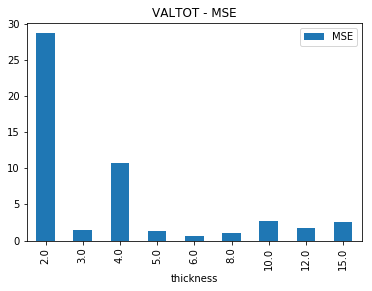

,MSE,COART
,mean,count
thickness,,
2.0,28.629034,26
3.0,1.450775,106
4.0,10.724962,187
5.0,1.333774,142
6.0,0.609902,299
8.0,1.111802,243
10.0,2.670960,149
12.0,1.700088,91


In [12]:
# Is the error sourced by thickness ?
df = dataset[['MSE', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.title(f'VALTOT - MSE')
plt.show()
dataset.groupby('thickness').agg({'MSE':['mean'],
                                         'COART':['count']})

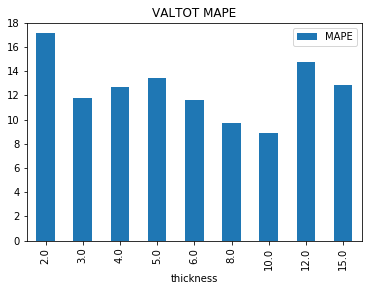

MAPE             COART
                mean         max count
thickness                             
2.0        17.111785   97.036533    26
3.0        11.815067  117.585310   106
4.0        12.715946   79.129191   187
5.0        13.432986   91.513855   142
6.0        11.621523   80.740488   299
8.0         9.743121   62.308267   243
10.0        8.920451   50.508699   149
12.0       14.778868  230.458692    91
15.0       12.851122   63.867152    52

In [13]:
# Is the error sourced by thickness ?
df = dataset[['MAPE', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.title(f'VALTOT MAPE')
plt.show()
dataset.groupby('thickness').agg({'MAPE':['mean', 'max'],
                                         'COART':['count']})

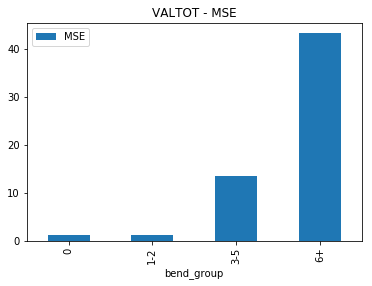

MSE                    MAPE             COART
                 mean          max       mean         max count
bend_group                                                     
0            1.081884    62.352386  13.182731  117.585310   535
1-2          1.221209   104.265913  10.635762  230.458692   579
3-5         13.494379  1723.089778  10.399560   70.584991   164
6+          43.272777   556.010619  14.762964   97.036533    17

In [14]:
# Is the error sourced by number of bends ?

df = dataset[['MSE', 'bend_group']].groupby('bend_group').mean()
df.plot.bar()
plt.title(f'VALTOT - MSE')
plt.show()
dataset.groupby('bend_group').agg({'MSE':['mean', 'max'],
                                         'MAPE':['mean', 'max'],
                                         'COART':['count']})

In [15]:
dataset.groupby('thickness')['COART'].count()

thickness
2.0      26
3.0     106
4.0     187
5.0     142
6.0     299
8.0     243
10.0    149
12.0     91
15.0     52
Name: COART, dtype: int64

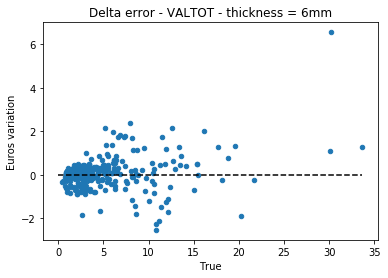

,delta_VALTOT
count,299.000000
mean,0.080201
std,0.778136
min,-2.530270
25%,-0.226997
50%,0.078947
75%,0.303619
max,6.551130


In [16]:

thickness = 6

df = dataset[dataset['thickness']==thickness]

df.plot.scatter('VALTOT', 'delta_VALTOT')
plt.plot([0, df['VALTOT'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error - {} - thickness = {}mm'.format('VALTOT', thickness))
plt.xlabel('True')
plt.ylabel('Euros variation')
plt.show()
df[['delta_VALTOT']].describe()

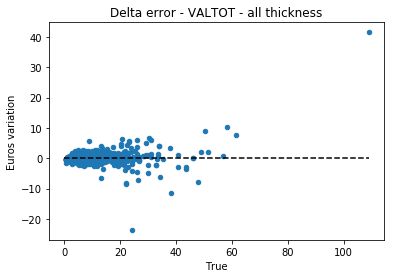

,delta_VALTOT
count,1295.000000
mean,0.072658
std,1.807542
min,-23.579877
25%,-0.308498
50%,0.033613
75%,0.324541
max,41.510117


In [17]:
thickness = 6

df = dataset#[dataset['thickness']==thickness]

df.plot.scatter('VALTOT', 'delta_VALTOT')
plt.plot([0, df['VALTOT'].max()], [0, 0], color='k', linestyle='--')
plt.title('Delta error - {} - all thickness'.format('VALTOT'))
plt.xlabel('True')
plt.ylabel('Euros variation')
plt.show()
df[['delta_VALTOT']].describe()

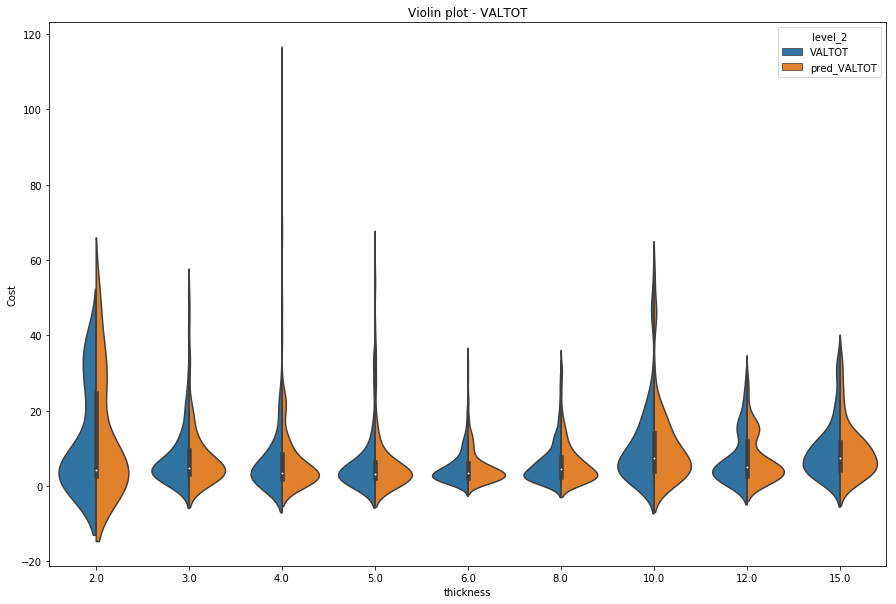

In [18]:
#Violin plot
df=dataset[['VALTOT', 'pred_VALTOT', 'COART', 'thickness']]
#df=df[df['thickness']!=15]
df.set_index(['COART', 'thickness'], inplace=True)
df = df.stack().reset_index()
fig, ax = plt.subplots(figsize=(15,10))
#ax.set_ylim(-100, 100)
sns.violinplot(x="thickness", y=0, data=df, split=True, hue='level_2', ax=ax)
plt.title(f'Violin plot - VALTOT')
plt.ylabel('Cost')
plt.show()

In [19]:
#General performance
df = dataset[['MSE','MAPE', 'thickness', 'bend_group', 'COART']].groupby(['thickness', 'bend_group'])

perf = df.agg({'MSE': ['mean', 'max'],
        'MAPE': ['mean', 'max'],
        'COART':['count'] })
perf.loc[6]

MSE                  MAPE            COART
                mean        max       mean        max count
bend_group                                                 
0           0.283994   6.402269  13.336109  80.740488   112
1-2         0.466230   5.769868  10.446275  65.530253   149
3-5         2.185605  42.917305  11.384887  70.584991    37
6+          0.217894   0.217894   3.455154   3.455154     1